Xây dựng mô hình dự báo thời gian trễ chuyến bay đến (Arrival Delay) dựa trên thông tin khởi hành và vận hành mặt đất

Làm sạch dữ liệu

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import os
os.chdir(r"C:\Users\USER\PyCharmMiscProject\IE313.Q12")

In [11]:
df = pd.read_csv(r"dataset/flights_sample_3m.csv")
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [13]:
print(df.isna().sum())

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [14]:
df = df[[
    "FL_DATE",
    "AIRLINE_CODE",
    "FL_NUMBER",
    "ORIGIN",
    "DEST",
    "CRS_DEP_TIME",
    "CRS_ARR_TIME",
    "DISTANCE",
    "ARR_DELAY"
]]


In [15]:
df

,FL_DATE,AIRLINE_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,ARR_DELAY
0,2019-01-09,UA,1562,FLL,EWR,1155,1501,1065.0,-14.0
1,2022-11-19,DL,1149,MSP,SEA,2120,2315,1399.0,-5.0
2,2022-07-22,UA,459,DEN,MSP,954,1252,680.0,0.0
3,2023-03-06,DL,2295,MSP,SFO,1609,1829,1589.0,24.0
4,2020-02-23,NK,407,MCO,DFW,1840,2041,985.0,-1.0
...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,AA,1522,JAX,CLT,1742,1907,328.0,-16.0
2999996,2022-11-02,AA,1535,ORD,AUS,1300,1556,977.0,-37.0
2999997,2022-09-11,DL,2745,HSV,ATL,534,729,151.0,36.0
2999998,2019-11-13,YX,6134,BOS,LGA,1600,1728,184.0,-16.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   AIRLINE_CODE  object 
 2   FL_NUMBER     int64  
 3   ORIGIN        object 
 4   DEST          object 
 5   CRS_DEP_TIME  int64  
 6   CRS_ARR_TIME  int64  
 7   DISTANCE      float64
 8   ARR_DELAY     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 206.0+ MB


In [17]:
print(df.isna().sum())

FL_DATE             0
AIRLINE_CODE        0
FL_NUMBER           0
ORIGIN              0
DEST                0
CRS_DEP_TIME        0
CRS_ARR_TIME        0
DISTANCE            0
ARR_DELAY       86198
dtype: int64


Có 86198 dòng ARR_DELAY bị NaN trên tổng số 3 triệu dòng dữ liệu của dataset -> Quá ít -> Xóa luôn

In [18]:
df = df.dropna(subset=["ARR_DELAY"])

Tiền xử lí dữ liệu

In [19]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

C:\Users\USER\AppData\Local\Temp\ipykernel_31932\2897151595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])


In [20]:
df["YEAR"] = df["FL_DATE"].dt.year
df["MONTH"] = df["FL_DATE"].dt.month
df["DAY"] = df["FL_DATE"].dt.day
df["WEEKDAY"] = df["FL_DATE"].dt.weekday

C:\Users\USER\AppData\Local\Temp\ipykernel_31932\2172852486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YEAR"] = df["FL_DATE"].dt.year
C:\Users\USER\AppData\Local\Temp\ipykernel_31932\2172852486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MONTH"] = df["FL_DATE"].dt.month
C:\Users\USER\AppData\Local\Temp\ipykernel_31932\2172852486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [21]:
df

,FL_DATE,AIRLINE_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,ARR_DELAY,YEAR,MONTH,DAY,WEEKDAY
0,2019-01-09,UA,1562,FLL,EWR,1155,1501,1065.0,-14.0,2019,1,9,2
1,2022-11-19,DL,1149,MSP,SEA,2120,2315,1399.0,-5.0,2022,11,19,5
2,2022-07-22,UA,459,DEN,MSP,954,1252,680.0,0.0,2022,7,22,4
3,2023-03-06,DL,2295,MSP,SFO,1609,1829,1589.0,24.0,2023,3,6,0
4,2020-02-23,NK,407,MCO,DFW,1840,2041,985.0,-1.0,2020,2,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,AA,1522,JAX,CLT,1742,1907,328.0,-16.0,2022,11,13,6
2999996,2022-11-02,AA,1535,ORD,AUS,1300,1556,977.0,-37.0,2022,11,2,2
2999997,2022-09-11,DL,2745,HSV,ATL,534,729,151.0,36.0,2022,9,11,6
2999998,2019-11-13,YX,6134,BOS,LGA,1600,1728,184.0,-16.0,2019,11,13,2


Chuyển CRS_DEP_TIME / CRS_ARR_TIME sang phút trong ngày

In [22]:
def convert_time(t):
    t = int(t)
    return (t // 100) * 60 + (t % 100)

df["DEP_MIN"] = df["CRS_DEP_TIME"].apply(convert_time)
df["ARR_MIN"] = df["CRS_ARR_TIME"].apply(convert_time)

C:\Users\USER\AppData\Local\Temp\ipykernel_31932\4196097718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DEP_MIN"] = df["CRS_DEP_TIME"].apply(convert_time)
C:\Users\USER\AppData\Local\Temp\ipykernel_31932\4196097718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ARR_MIN"] = df["CRS_ARR_TIME"].apply(convert_time)


Xóa cột không cần nữa

In [23]:
df = df.drop(columns=["CRS_DEP_TIME", "CRS_ARR_TIME", "FL_DATE"])

EDA (khám phá dữ liệu)

In [24]:
df.head()

,AIRLINE_CODE,FL_NUMBER,ORIGIN,DEST,DISTANCE,ARR_DELAY,YEAR,MONTH,DAY,WEEKDAY,DEP_MIN,ARR_MIN
0,UA,1562,FLL,EWR,1065.0,-14.0,2019,1,9,2,715,901
1,DL,1149,MSP,SEA,1399.0,-5.0,2022,11,19,5,1280,1395
2,UA,459,DEN,MSP,680.0,0.0,2022,7,22,4,594,772
3,DL,2295,MSP,SFO,1589.0,24.0,2023,3,6,0,969,1109
4,NK,407,MCO,DFW,985.0,-1.0,2020,2,23,6,1120,1241


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913802 entries, 0 to 2999999
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   AIRLINE_CODE  object 
 1   FL_NUMBER     int64  
 2   ORIGIN        object 
 3   DEST          object 
 4   DISTANCE      float64
 5   ARR_DELAY     float64
 6   YEAR          int32  
 7   MONTH         int32  
 8   DAY           int32  
 9   WEEKDAY       int32  
 10  DEP_MIN       int64  
 11  ARR_MIN       int64  
dtypes: float64(2), int32(4), int64(3), object(3)
memory usage: 244.5+ MB


In [26]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe(include='all')

,AIRLINE_CODE,FL_NUMBER,ORIGIN,DEST,DISTANCE,ARR_DELAY,YEAR,MONTH,DAY,WEEKDAY,DEP_MIN,ARR_MIN
count,2913802,2913802.00,2913802,2913802,2913802.00,2913802.00,2913802.00,2913802.00,2913802.00,2913802.00,2913802.00,2913802.00
unique,18,NaN,380,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WN,NaN,ATL,ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,555869,NaN,150749,150750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2508.09,NaN,NaN,810.72,4.26,2020.88,6.27,15.72,2.98,806.43,905.70
std,NaN,1745.98,NaN,NaN,589.37,51.17,1.42,3.38,8.76,2.00,292.52,306.93
min,NaN,1.00,NaN,NaN,29.00,-96.00,2019.00,1.00,1.00,0.00,1.00,1.00
25%,NaN,1049.00,NaN,NaN,378.00,-16.00,2019.00,3.00,8.00,1.00,555.00,667.00
50%,NaN,2149.00,NaN,NaN,653.00,-7.00,2021.00,6.00,16.00,3.00,797.00,915.00
75%,NaN,3790.00,NaN,NaN,1047.00,7.00,2022.00,9.00,23.00,5.00,1050.00,1158.00


Nhận xét tổng quan các cột đều ổn. Tuy nhiên ARR_DELAY có outlier ( max = 2934 ~ 49 giờ ) trong khi mean có 4.26 phút. Cần loại bỏ

Thống kê mô tả ARR_DELAY

In [27]:
df['ARR_DELAY'].describe()

count   2913802.00
mean          4.26
std          51.17
min         -96.00
25%         -16.00
50%          -7.00
75%           7.00
max        2934.00
Name: ARR_DELAY, dtype: float64

Biểu đồ phân phối

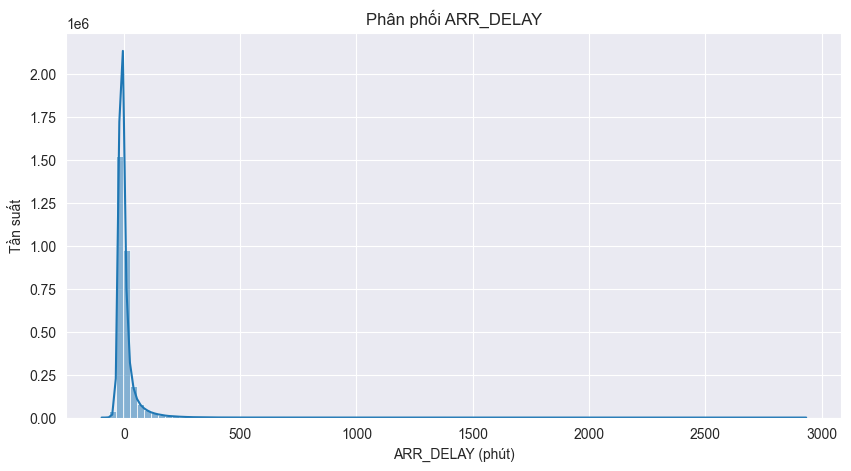

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['ARR_DELAY'], bins=100, kde=True)
plt.title("Phân phối ARR_DELAY")
plt.xlabel("ARR_DELAY (phút)")
plt.ylabel("Tần suất")
plt.show()

Vẽ Boxplot để XÁC NHẬN outlier

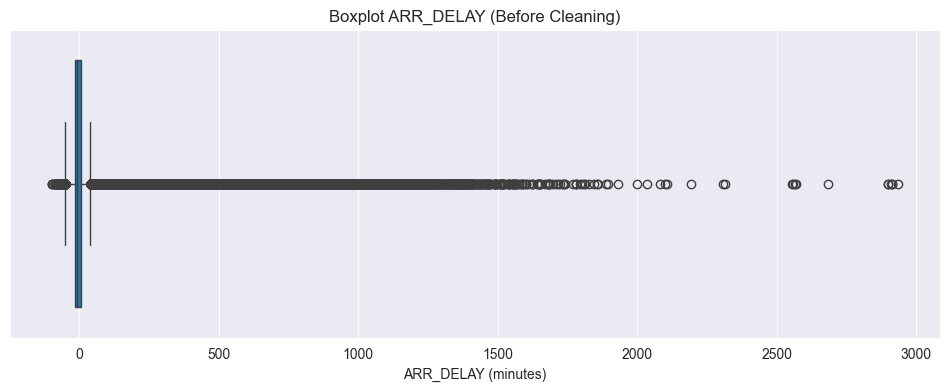

In [29]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['ARR_DELAY'])
plt.title("Boxplot ARR_DELAY (Before Cleaning)")
plt.xlabel("ARR_DELAY (minutes)")
plt.show()

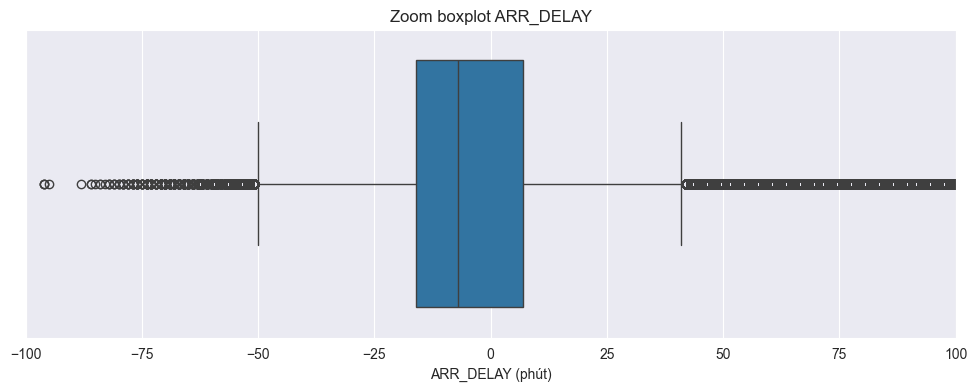

In [30]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['ARR_DELAY'])
plt.xlim(-100, 100)   # Giới hạn vùng nhìn
plt.title("Zoom boxplot ARR_DELAY")
plt.xlabel("ARR_DELAY (phút)")
plt.show()

Sau khi phóng to vùng chính của boxplot ARR_DELAY, có thể thấy phân phối thời gian đến thực tế tập trung rất mạnh trong vùng nhỏ từ khoảng −15 đến +5 phút. Đây cũng chính là khoảng IQR (interquartile range), cho thấy 50% số chuyến bay đến sớm hoặc trễ không quá 15 phút.

Median nằm xấp xỉ 0 phút, nghĩa là phần lớn chuyến bay đến đúng giờ hoặc đến sớm nhẹ.

Whisker dưới kéo dài đến khoảng −50 phút, phản ánh việc nhiều chuyến bay hạ cánh sớm hơn lịch trình. Whisker trên chỉ đến khoảng +40 phút, cho thấy các chuyến bay trễ nhẹ (dưới 40 phút) là phổ biến.

Tuy nhiên, bên ngoài whisker xuất hiện rất nhiều outlier trễ nặng, trong đó có những giá trị lên đến hơn 1000–3000 phút. Đây chủ yếu là những chuyến bay bị hủy hoặc diverted, không đại diện cho hành vi delay thông thường của hành khách.

Tuy nhiên sẽ không cắt outlier theo IQR, bới vì theo box plot những chuyến bay trễ từ 40 phút và sớm hơn 50 phút được xem là outlier.
Nhưng thực tế trễ 40, 60, 80 phút là chuyện cực bình thường trong dữ liệu máy bay. Sẽ xứ lí cắt theo domain.
Cắt theo domain nghĩa là cắt outlier dựa trên kiến thức thực tế (nghiệp vụ) của lĩnh vực hàng không

In [31]:
before = len(df)
df = df[df['ARR_DELAY'].between(-60, 300)]
after = len(df)

print("Số dòng ban đầu:", before)
print("Số dòng sau khi cắt:", after)
print("Số dòng bị cắt:", before - after)
print("Tỷ lệ bị cắt: {:.2f}%".format((before - after) / before * 100))

Số dòng ban đầu: 2913802
Số dòng sau khi cắt: 2902818
Số dòng bị cắt: 10984
Tỷ lệ bị cắt: 0.38%


Vẽ lại histogram & boxplot để chứng minh dữ liệu đã sạch

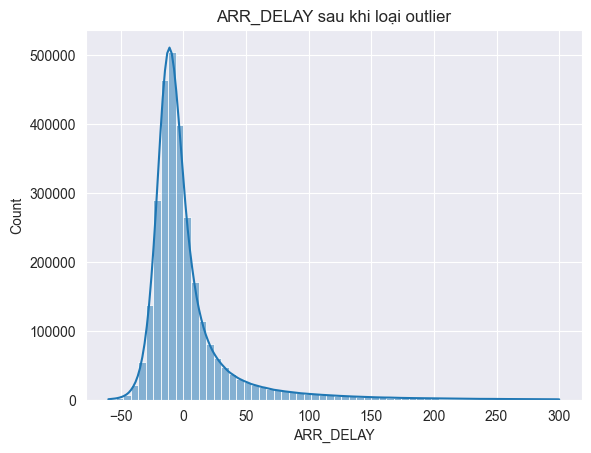

In [32]:
sns.histplot(df['ARR_DELAY'], bins=60, kde=True)
plt.title("ARR_DELAY sau khi loại outlier")
plt.show()

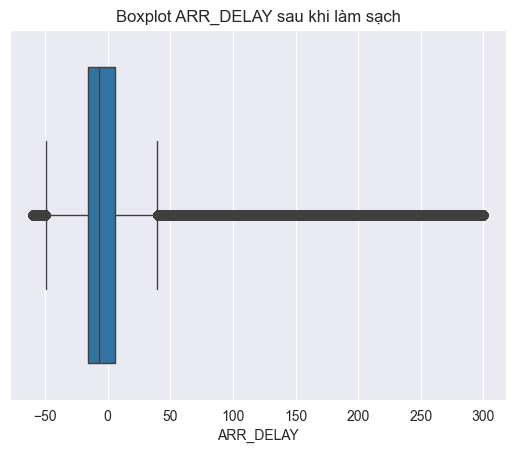

In [33]:
sns.boxplot(x=df['ARR_DELAY'])
plt.title("Boxplot ARR_DELAY sau khi làm sạch")
plt.show()

Phân tích thăm dò

1. Origin

Vì có tới 380 sân bay khác nhau, nên lấy 20 sân bay có delay trung bình cao nhất

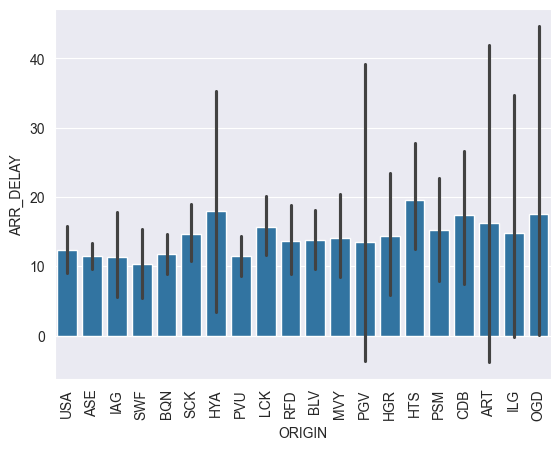

In [34]:
top20_delay = (
    df.groupby('ORIGIN')['ARR_DELAY']
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index
)

sns.barplot(data=df[df['ORIGIN'].isin(top20_delay)],
            x='ORIGIN', y='ARR_DELAY')
plt.xticks(rotation=90)
plt.show()


2. Dest

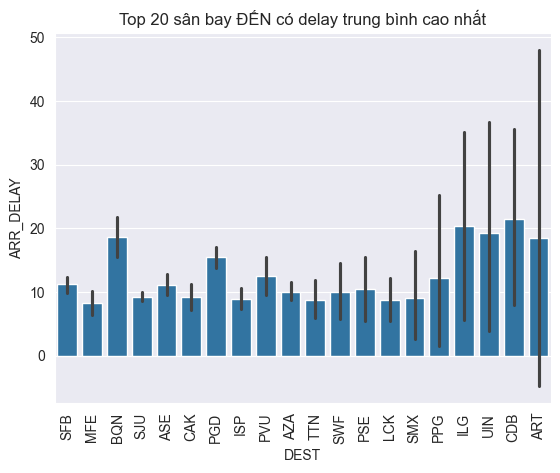

In [35]:
top20_dest_delay = (
    df.groupby('DEST')['ARR_DELAY']
      .mean()
      .sort_values(ascending=False)
      .head(20)
      .index
)

sns.barplot(
    data=df[df['DEST'].isin(top20_dest_delay)],
    x='DEST',
    y='ARR_DELAY'
)
plt.xticks(rotation=90)
plt.title("Top 20 sân bay ĐẾN có delay trung bình cao nhất")
plt.show()


3. DISTANCE

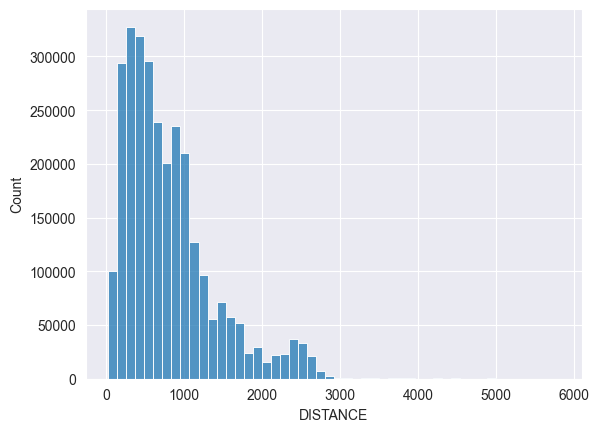

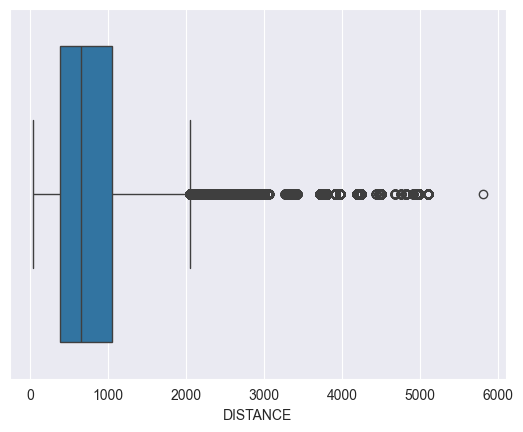

count   2902818.00
mean        810.37
std         588.94
min          29.00
25%         378.00
50%         653.00
75%        1046.00
max        5812.00
Name: DISTANCE, dtype: float64

In [36]:
sns.histplot(df['DISTANCE'], bins=50)
plt.show()

sns.boxplot(x=df['DISTANCE'])
plt.show()

df['DISTANCE'].describe()

4. DEP_MIN

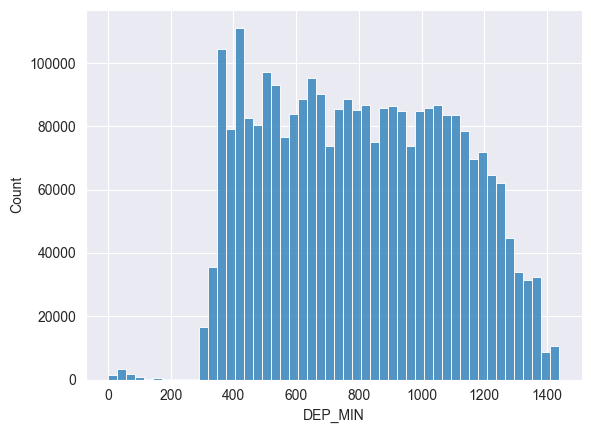

In [ ]:
sns.histplot(df['DEP_MIN'], bins=50)
plt.show()

sns.boxplot(x=df['DEP_MIN'])
plt.show()

df['DEP_MIN'].describe()


5. ARR_MIN

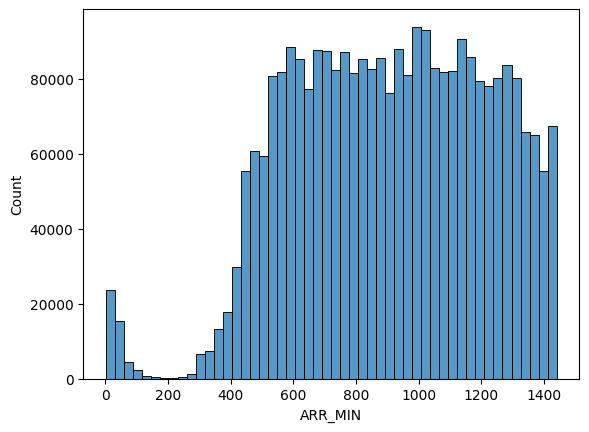

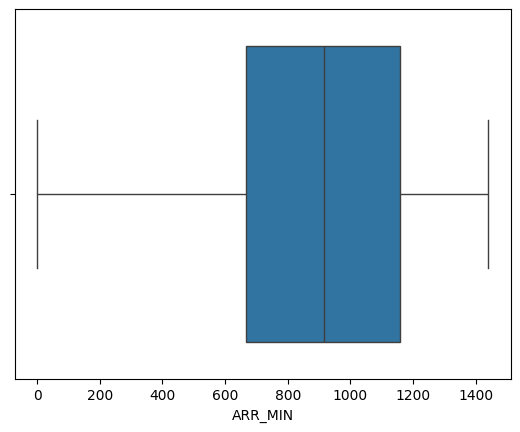

count   2902818.00
mean        905.65
std         306.84
min           1.00
25%         667.00
50%         915.00
75%        1157.00
max        1440.00
Name: ARR_MIN, dtype: float64

In [166]:
sns.histplot(df['ARR_MIN'], bins=50)
plt.show()

sns.boxplot(x=df['ARR_MIN'])
plt.show()

df['ARR_MIN'].describe()


6. MONTH

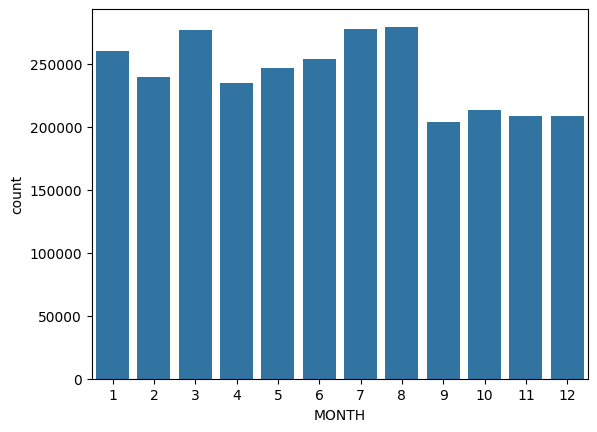

In [167]:
df['MONTH'].value_counts()
sns.countplot(x=df['MONTH'])
plt.show()

7. WEEKDAY

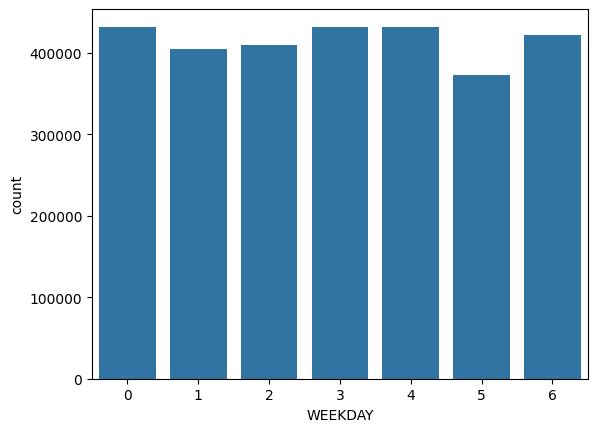

In [168]:
df['WEEKDAY'].value_counts()
sns.countplot(x=df['WEEKDAY'])
plt.show()

8. DAY

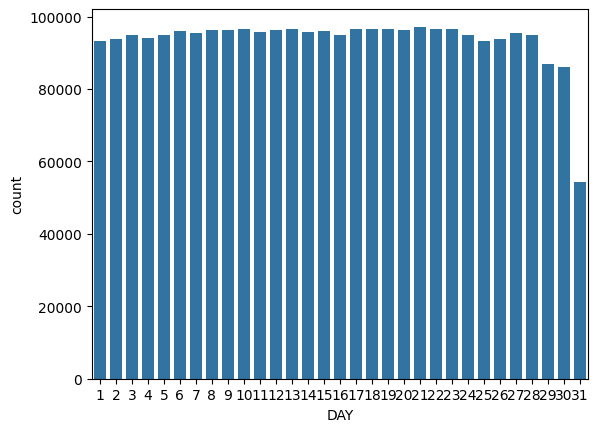

In [169]:
df['DAY'].value_counts()
sns.countplot(x=df['DAY'])
plt.show()

Phân tích tương quan

1. DEP_MIN → ARR_DELAY

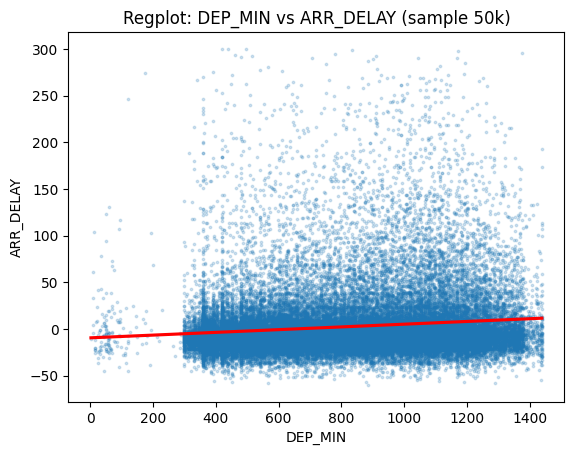

In [158]:
sample_df = df.sample(50000, random_state=42)

sns.regplot(
    data=sample_df,
    x='DEP_MIN',
    y='ARR_DELAY',
    scatter_kws={'s':3, 'alpha':0.2},
    line_kws={'color':'red'}
)
plt.title("Regplot: DEP_MIN vs ARR_DELAY (sample 50k)")
plt.show()


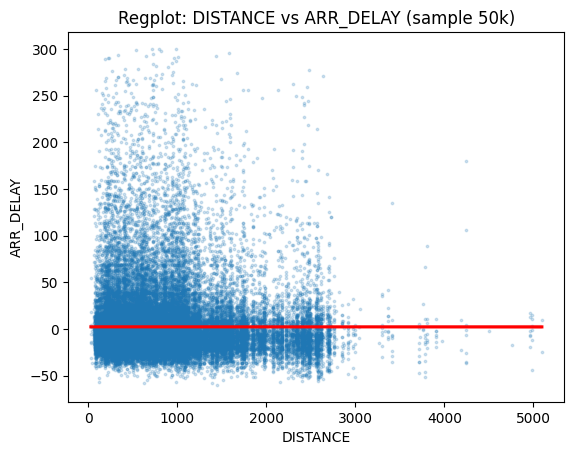

In [159]:
sample_df = df.sample(50000, random_state=42)

sns.regplot(
    data=sample_df,
    x='DISTANCE',
    y='ARR_DELAY',
    scatter_kws={'s':3, 'alpha':0.2},
    line_kws={'color':'red'}
)
plt.title("Regplot: DISTANCE vs ARR_DELAY (sample 50k)")
plt.show()


3. MONTH → ARR_DELAY

In [175]:
groups = [df[df['MONTH']==m]['ARR_DELAY'] for m in range(1,13)]
f,p = f_oneway(*groups)
print(f,p)

1704.035032984611 0.0


4. WEEKDAY → ARR_DELAY

In [176]:
groups = [df[df['WEEKDAY']==d]['ARR_DELAY'] for d in range(7)]
f,p = f_oneway(*groups)
print(f,p)

657.8408314346724 0.0


5. DAY → ARR_DELAY

In [178]:
groups = [df[df['DAY']==d]['ARR_DELAY'] for d in range(1,32)]
f,p = f_oneway(*groups)
print(f,p)

52.66919122477308 4.124789531e-314


6. AIRLINE_CODE → ARR_DELAY

In [179]:
groups=[df[df['AIRLINE_CODE']==c]['ARR_DELAY'] for c in df['AIRLINE_CODE'].unique()]
f,p=f_oneway(*groups)
print(f,p)

1059.097471877093 0.0


Kiểm định ANOVA một chiều giữa hãng hàng không (AIRLINE_CODE) và thời gian trễ đến (ARR_DELAY) cho kết quả F = 1059.10 với p-value ≈ 0.
Điều này cho thấy sự khác biệt về thời gian đến trễ giữa các hãng bay là có ý nghĩa thống kê ở mức 95%.
Nói cách khác, mức độ delay của các hãng bay không giống nhau và hãng bay là một yếu tố quan trọng ảnh hưởng đến ARR_DELAY.
Do đó, biến AIRLINE_CODE nên được giữ lại trong mô hình dự đoán.

7. ORIGIN → ARR_DELAY

In [180]:
groups = [df[df['ORIGIN']==o]['ARR_DELAY'] for o in df['ORIGIN'].unique()]
f,p = f_oneway(*groups)
print(f,p)

40.378291170946 0.0


8. DEST → ARR_DELAY

In [181]:
groups = [df[df['DEST']==o]['ARR_DELAY'] for o in df['DEST'].unique()]
f,p = f_oneway(*groups)
print(f,p)

33.933261485592084 0.0


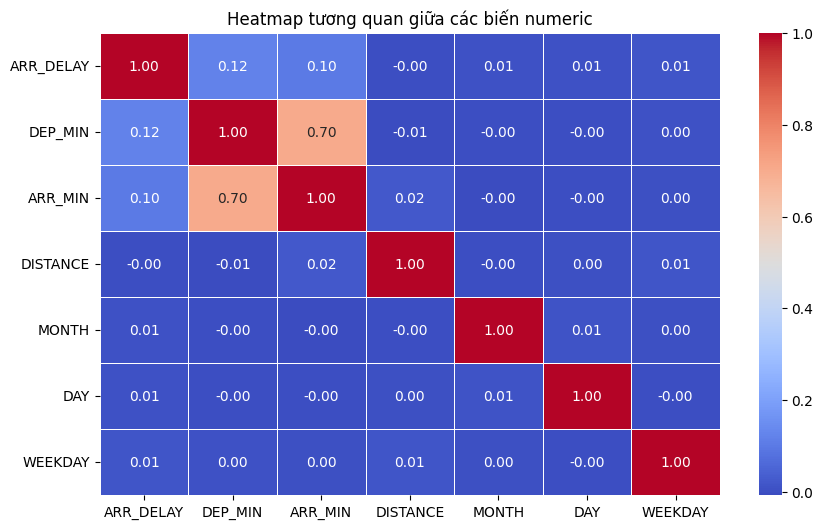

In [125]:
numeric_cols = ['ARR_DELAY', 'DEP_MIN', 'ARR_MIN', 'DISTANCE',
                'MONTH', 'DAY', 'WEEKDAY']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title("Heatmap tương quan giữa các biến numeric")
plt.show()